# COSWARA Dataset

## Observations
- Initial observations of the data indicated that there was a combined CSV file already provided by the authors.
- However, upon exploring the folders, there were CSV files for each date that the reports were taken.
- So, I wrote a Python code (`create_combined_csv.py`) to consolidate all the CSV files into one.
- Running `create_combined_csv.py` generates `combinedScriptDataAllFolders.csv`, so we will use that CSV for our analysis.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

## Importing dataset

In [6]:
dataset = pd.read_csv('combinedScriptDataAllFolders.csv')

In [7]:
dataset.head()

,Unnamed: 0,id,a,cold,record_date,cough,covid_status,ctDate,ctScan,ctScore,dT,diabetes,diarrhoea,ep,fV,fever,g,ht,l_c,l_l,l_s,loss_of_smell,mp,rU,smoker,testType,test_date,test_status,um,vacc,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia,iF,date,test
0,0,9hXEs9OejdVxG6JJGCyKQpqVvy43,67,True,2021-07-19,True,positive_moderate,2021-07-17,y,6.0,web,True,True,y,2.0,True,male,True,India,Annur coimbator,Tamil Nadu,True,True,n,n,rtpcr,2021-07-16,p,y,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,dPi1G2i821MDlbBUQWboTaExz023,24,NaN,2021-08-16,NaN,healthy,NaN,n,NaN,web,NaN,NaN,y,2.0,NaN,male,NaN,India,Coimbatore,Tamil Nadu,NaN,NaN,n,n,rtpcr,2021-07-15,n,y,y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,TqZXC5KdCZOC4T7p69TUNnU9abD3,81,True,2021-08-16,True,resp_illness_not_identified,NaN,n,NaN,web,NaN,NaN,n,2.0,NaN,male,NaN,India,Coimbatore,Tamil Nadu,NaN,NaN,n,y,NaN,NaN,na,y,y,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,356wSucV0OV6VQMvozjX63pIXrH2,24,True,2021-07-28,True,no_resp_illness_exposed,NaN,n,NaN,web,NaN,NaN,y,2.0,NaN,male,NaN,India,Khagaria,Bihar,NaN,True,n,n,NaN,NaN,na,n,n,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,OPOiHCtB3WXhEdnsofhMpnP8bak1,38,NaN,2021-07-15,NaN,recovered_full,2021-07-07,y,8.0,web,NaN,NaN,y,2.0,NaN,male,NaN,India,Coimbatore,Tamil Nadu,NaN,NaN,n,n,rtpcr,2021-07-07,p,n,p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746 entries, 0 to 2745
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2746 non-null   int64  
 1   id               2746 non-null   object 
 2   a                2746 non-null   int64  
 3   cold             488 non-null    object 
 4   record_date      2746 non-null   object 
 5   cough            652 non-null    object 
 6   covid_status     2746 non-null   object 
 7   ctDate           153 non-null    object 
 8   ctScan           963 non-null    object 
 9   ctScore          153 non-null    float64
 10  dT               2142 non-null   object 
 11  diabetes         232 non-null    object 
 12  diarrhoea        52 non-null     object 
 13  ep               2746 non-null   object 
 14  fV               2066 non-null   float64
 15  fever            406 non-null    object 
 16  g                2746 non-null   object 
 17  ht            

There are a lot of null values in the dataset. To get a clearer understanding of how many missing values are present, we execute the following code.

In [9]:
(dataset.isna().sum()/len(dataset))*100

Unnamed: 0          0.000000
id                  0.000000
a                   0.000000
cold               82.228696
record_date         0.000000
cough              76.256373
covid_status        0.000000
ctDate             94.428259
ctScan             64.930808
ctScore            94.428259
dT                 21.995630
diabetes           91.551347
diarrhoea          98.106336
ep                  0.000000
fV                 24.763292
fever              85.214858
g                   0.000000
ht                 91.514931
l_c                 0.000000
l_l                11.689731
l_s                 0.000000
loss_of_smell      93.845594
mp                 88.164603
rU                 24.763292
smoker             60.451566
testType           70.684632
test_date          70.684632
test_status        51.456664
um                 37.800437
vacc               64.930808
bd                 92.316096
others_resp        97.378004
ftg                86.088857
st                 89.220685
ihd           

This gives a percentage of how many missing values are present in each column. 

## Initail analysis

- There are a lot of missing values, and this will not help us create any ML models.
- However, as I was looking at the website to understand how the data was collected, i.e., how the website works, I learned that people have to choose an option because all the questions are mandatory.
- This feature might not have been introduced beforehand. So, this could mean that the missing values represent values that are False, or that people don't have those particular conditions.

## Handeling the missing values

- As stated above, my analysis indicates that the missing values are actually false values because people did not have those particular conditions.

- So, I handled the missing values using Excel because I find it easier to manage them there rather than writing code.

## More data added

Exploring the data I found an annotations csv as well where the quality of the audio recordings is mentioned from 0 to 2.

I have written a code (`combined_data_final.py`) for merging the annotaions data as well.

This gives us all the data in one csv file.

## Using the T/F adjusted dataset

In [10]:
dataset = pd.read_csv('combined_audio_data_final_tf_adjusted.csv')

In [11]:
dataset.head()

,id,a,cold,record_date,cough,covid_status,ctDate,ctScan,ctScore,dT,diabetes,diarrhoea,ep,fV,fever,g,ht,l_c,l_l,l_s,loss_of_smell,mp,rU,smoker,testType,test_date,test_status,um,vacc,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia,iF,date,test,min_cough_heavy,max_cough_heavy,min_cough_shallow,max_cough_shallow,min_counting_fast,max_counting_fast,min_counting_normal,max_counting_normal,min_breathing_deep,max_breathing_deep,min_breathing_shallow,max_breathing_shallow,min_vowel_a,max_vowel_a,min_vowel_e,max_vowel_e,min_vowel_o,max_vowel_o
0,9hXEs9OejdVxG6JJGCyKQpqVvy43,67,True,2021-07-19,True,positive_moderate,2021-07-17,True,6.0,web,True,True,True,2.0,True,male,True,India,Annur coimbator,Tamil Nadu,True,True,False,False,rtpcr,2021-07-16,POSITIVE,True,NO DOSE,False,False,False,False,False,False,False,False,False,False,NaN,False,-27981,29300,-27408,27115,-24304,23207,-18595,21722,-7130,7341,-628,661,-18701,15680,-10273,10712,-8496,5725
1,dPi1G2i821MDlbBUQWboTaExz023,24,False,2021-08-16,False,healthy,NaN,False,NaN,web,False,False,True,2.0,False,male,False,India,Coimbatore,Tamil Nadu,False,False,False,False,rtpcr,2021-07-15,NEGATIVE,True,BOTH DOSES,False,False,False,False,False,False,False,False,False,False,NaN,False,-32693,32665,-32744,32453,-24200,25888,-26572,25386,-23182,23588,-11852,20799,-24447,23906,-14111,14940,-22092,26580
2,TqZXC5KdCZOC4T7p69TUNnU9abD3,81,True,2021-08-16,True,resp_illness_not_identified,NaN,False,NaN,web,False,False,False,2.0,False,male,False,India,Coimbatore,Tamil Nadu,False,False,False,True,NOT TAKEN,NaN,NOT TAKEN,True,BOTH DOSES,True,True,False,False,False,False,False,False,False,False,NaN,False,-25195,23375,-24644,26110,-693,644,-920,703,-520,352,-338,357,-15789,24215,-759,768,-473,462
3,356wSucV0OV6VQMvozjX63pIXrH2,24,True,2021-07-28,True,no_resp_illness_exposed,NaN,False,NaN,web,False,False,True,2.0,False,male,False,India,Khagaria,Bihar,False,True,False,False,NOT TAKEN,NaN,NOT TAKEN,False,NO DOSE,True,False,True,False,False,False,False,False,False,False,NaN,False,-31157,25435,-26478,32498,-24264,23341,-24376,22228,-24182,24848,-24404,32561,-23292,21096,-17512,19251,-23267,21707
4,OPOiHCtB3WXhEdnsofhMpnP8bak1,38,False,2021-07-15,False,recovered_full,2021-07-07,True,8.0,web,False,False,True,2.0,False,male,False,India,Coimbatore,Tamil Nadu,False,False,False,False,rtpcr,2021-07-07,POSITIVE,False,ONE DOSE,False,False,False,False,False,False,False,False,False,False,NaN,False,-26972,26942,-8952,11322,-22765,20531,-11608,9744,-27505,27351,-27364,24755,-12598,15992,-7136,8218,-15877,16658


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746 entries, 0 to 2745
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2746 non-null   object 
 1   a                      2746 non-null   int64  
 2   cold                   2746 non-null   bool   
 3   record_date            2746 non-null   object 
 4   cough                  2746 non-null   bool   
 5   covid_status           2746 non-null   object 
 6   ctDate                 153 non-null    object 
 7   ctScan                 2746 non-null   bool   
 8   ctScore                153 non-null    float64
 9   dT                     2142 non-null   object 
 10  diabetes               2746 non-null   bool   
 11  diarrhoea              2746 non-null   bool   
 12  ep                     2746 non-null   bool   
 13  fV                     2066 non-null   float64
 14  fever                  2746 non-null   bool   
 15  g   

In [13]:
numerical_cols = ['ctScore', 'fV']
categorical_cols = [
    'cold', 'cough', 'covid_status', 'ctScan', 'diabetes', 'diarrhoea', 'ep', 
    'fever', 'ht', 'loss_of_smell', 'mp', 'rU', 'smoker', 'testType', 
    'test_status', 'um', 'vacc', 'bd', 'others_resp', 'ftg', 'st', 'ihd', 
    'asthma', 'others_preexist', 'cld', 'pneumonia', 'iF'
]

In [15]:
# Function to plot distribution of numerical columns
def plot_numerical_distribution(df, cols):
    for col in cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

In [16]:
# Function to plot distribution of categorical columns
def plot_categorical_distribution(df, cols):
    for col in cols:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

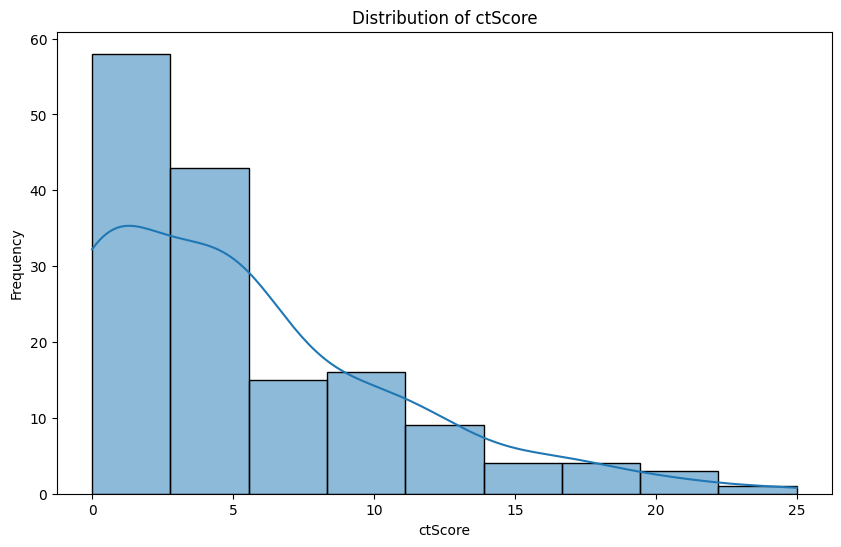

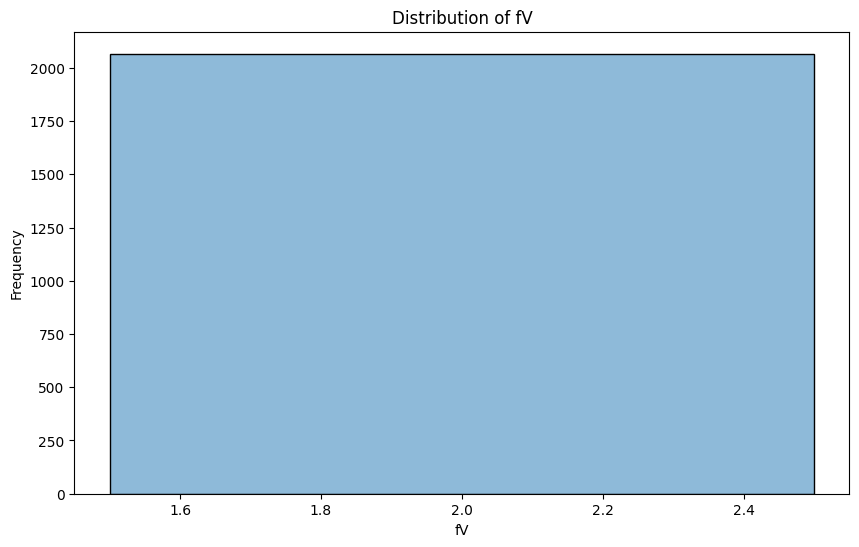

In [17]:
plot_numerical_distribution(dataset, numerical_cols)

Distribution of ct score is right skewned.

Right skewness could suggest that most patients have low ctScore, while a smaller number of patients have higher severity scores.

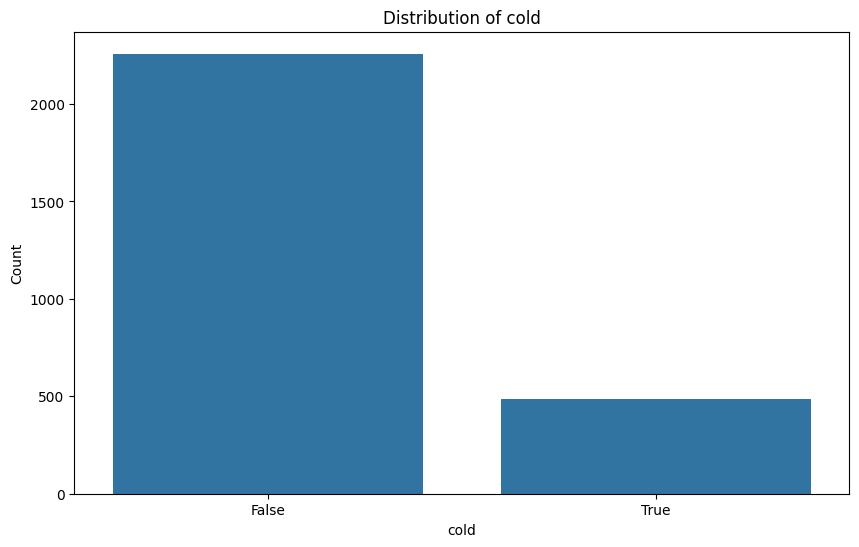

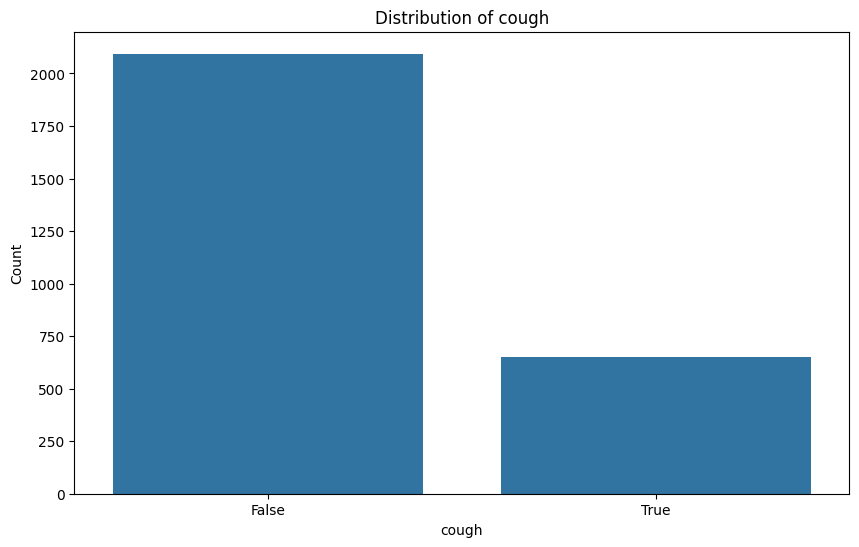

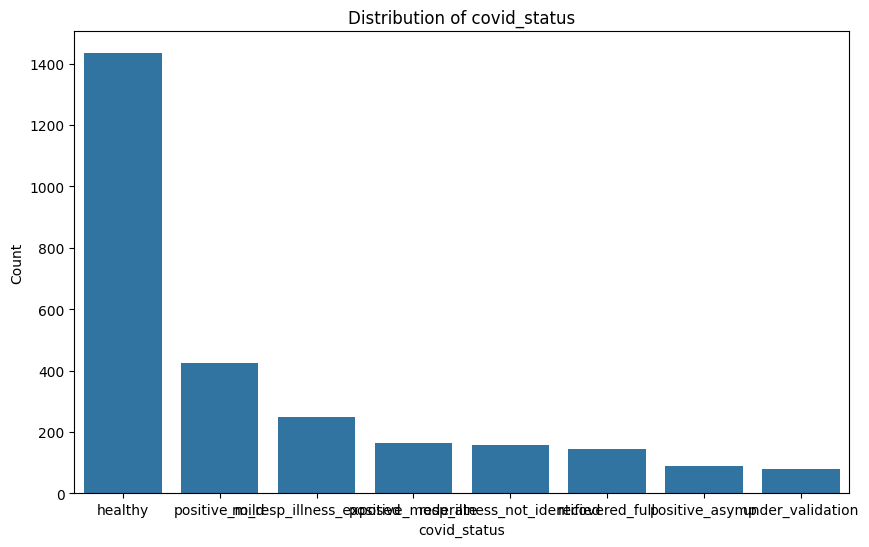

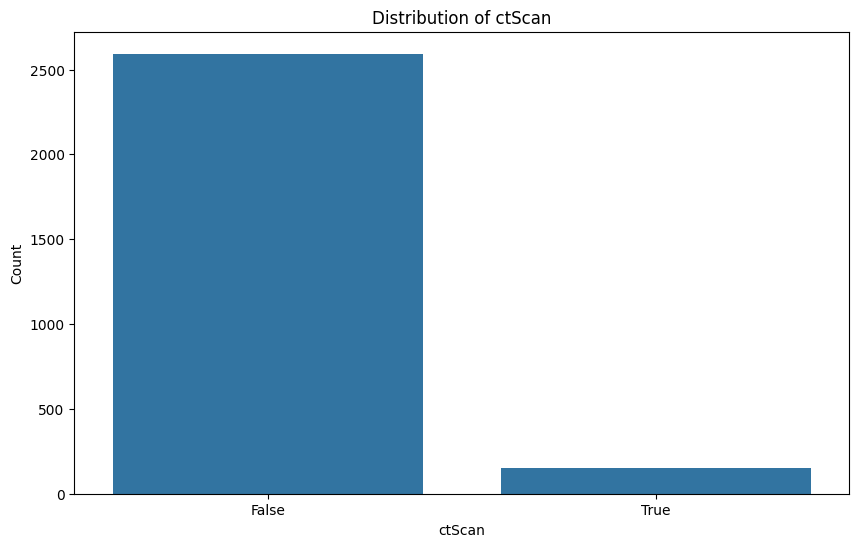

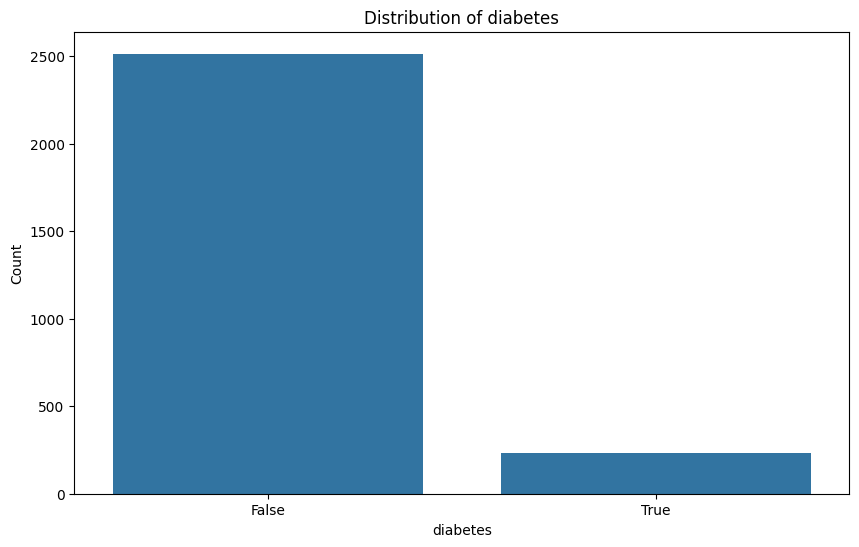

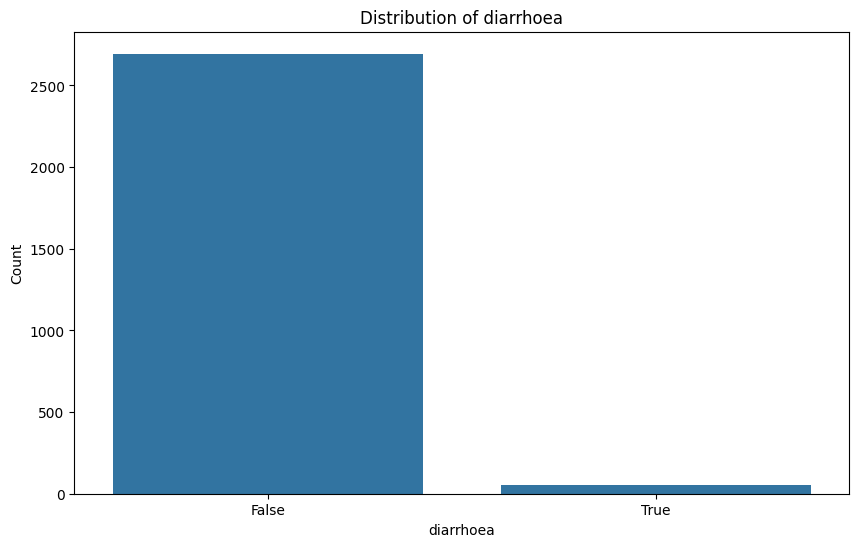

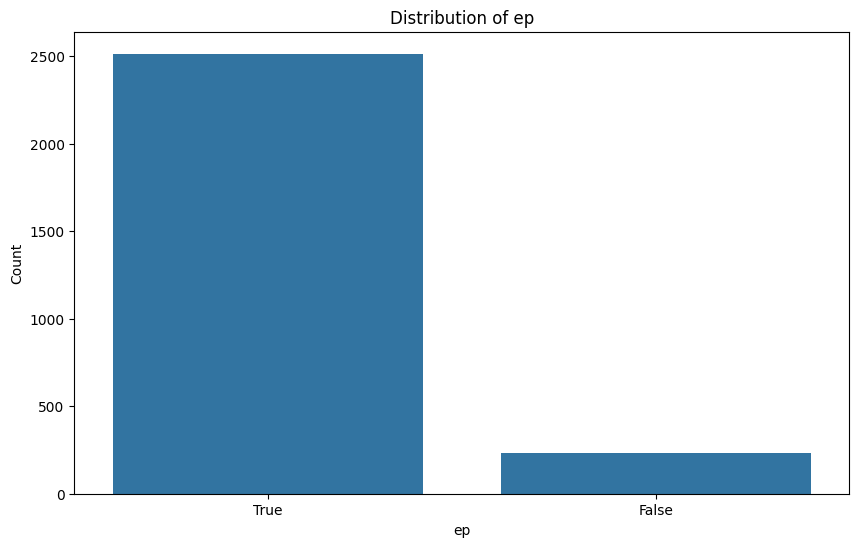

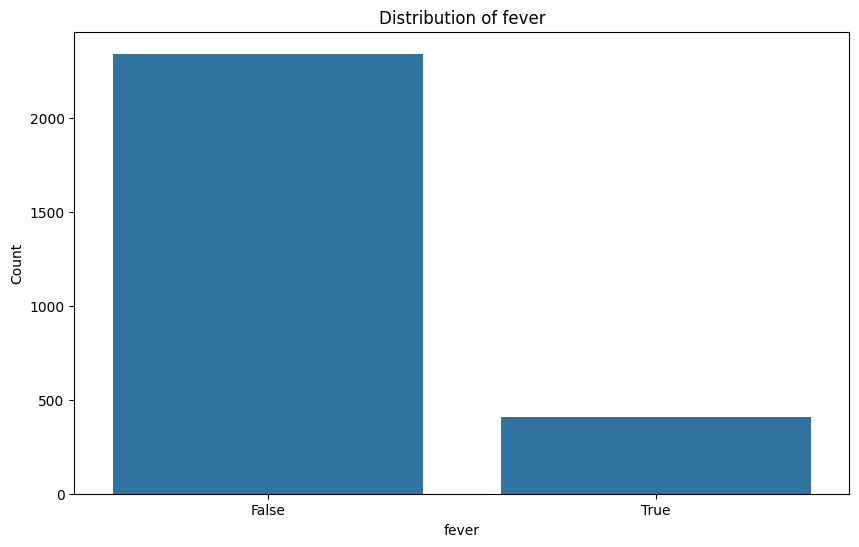

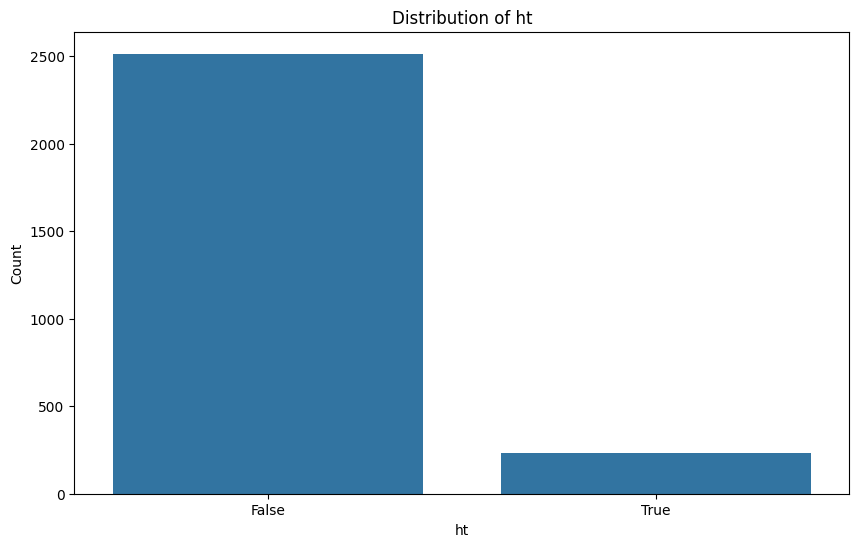

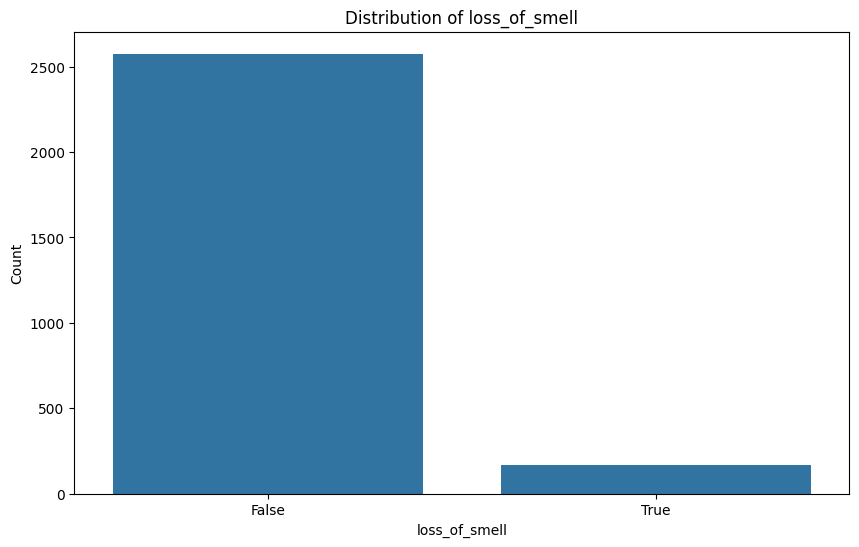

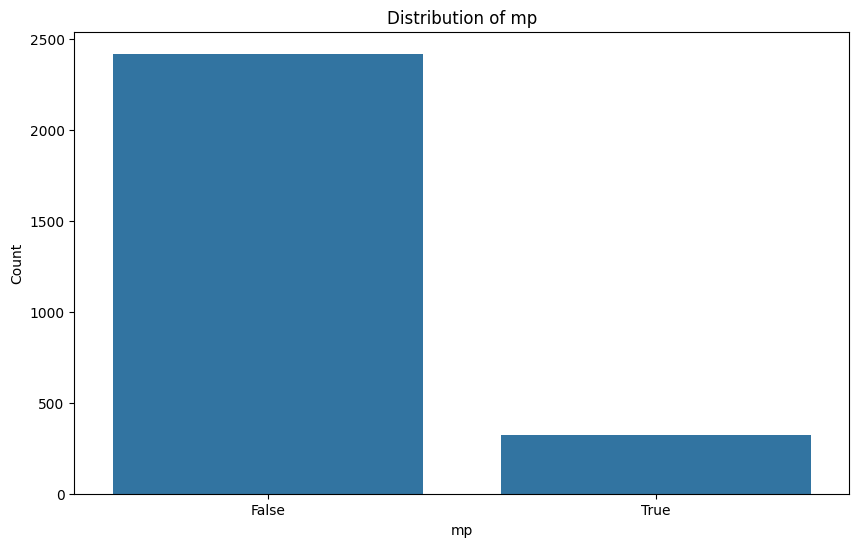

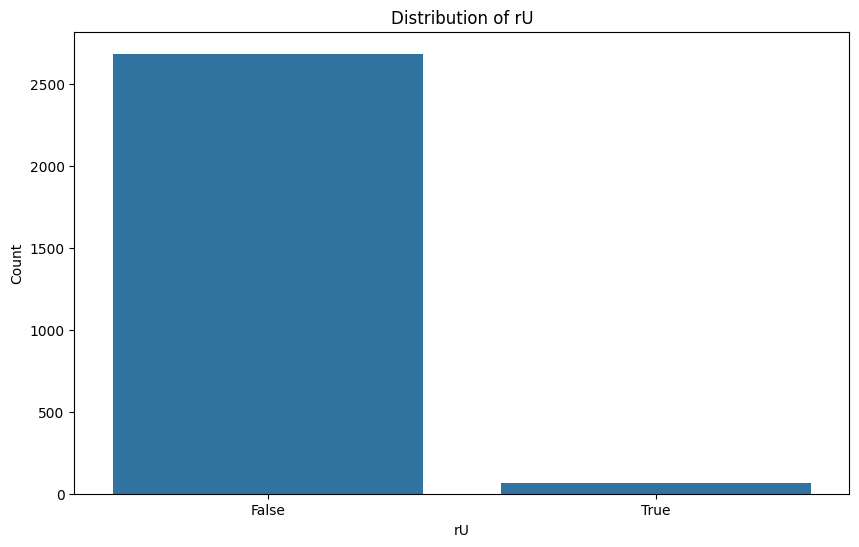

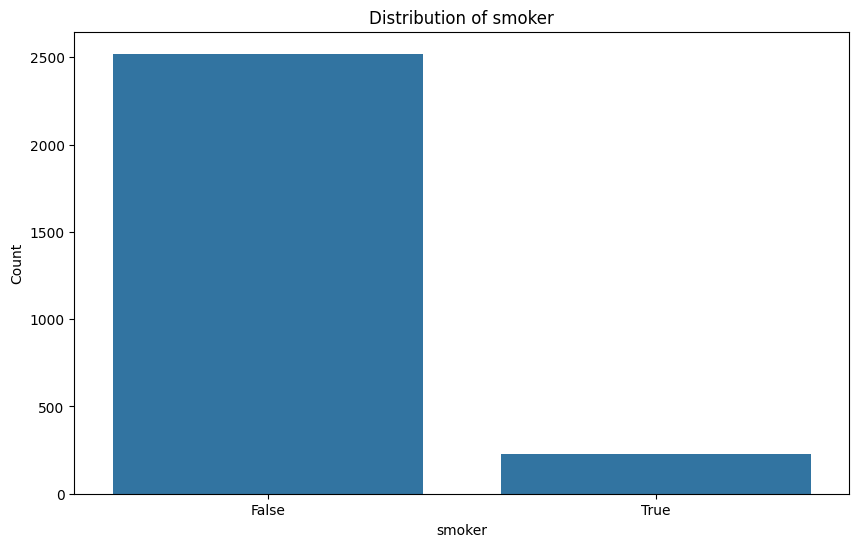

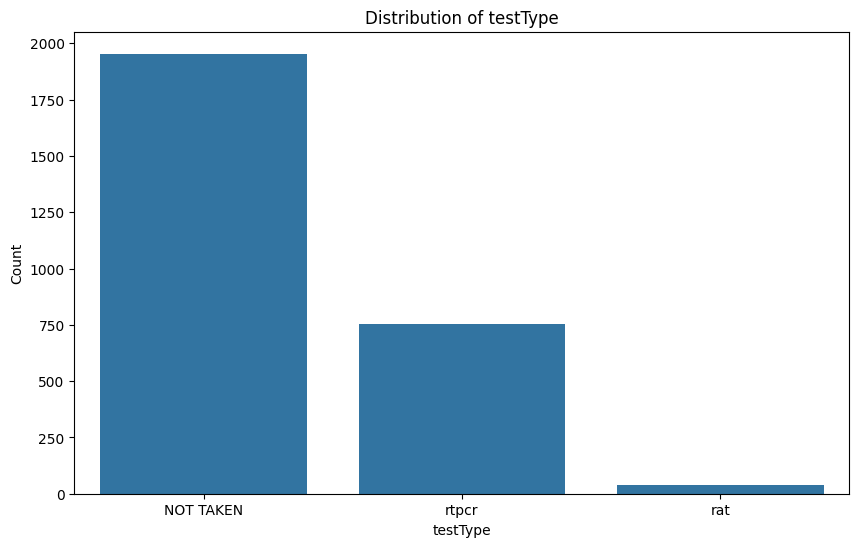

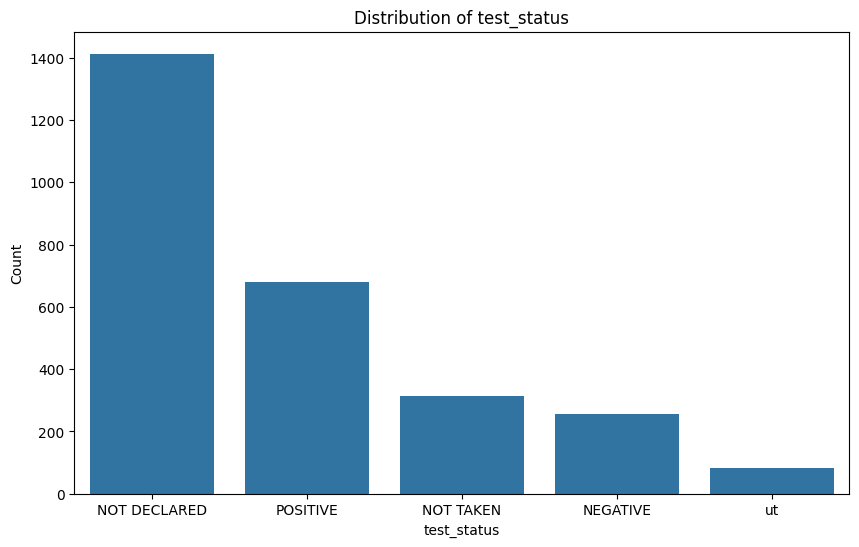

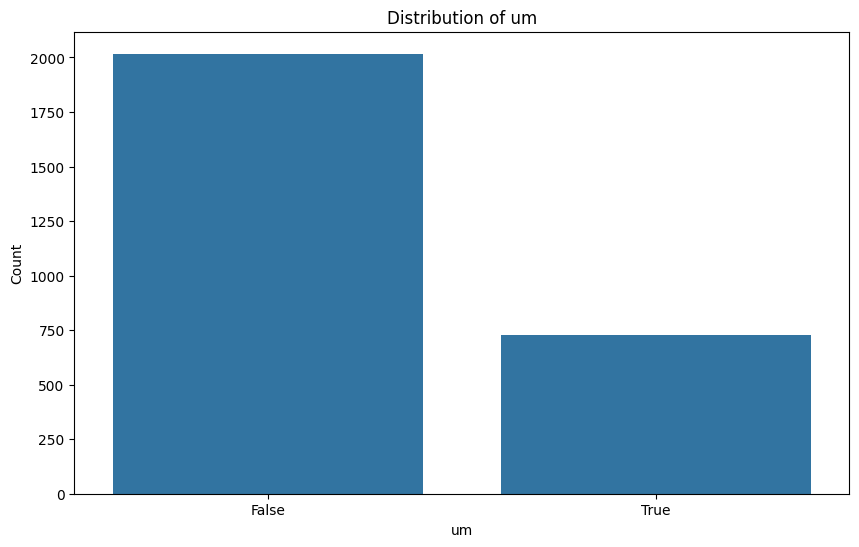

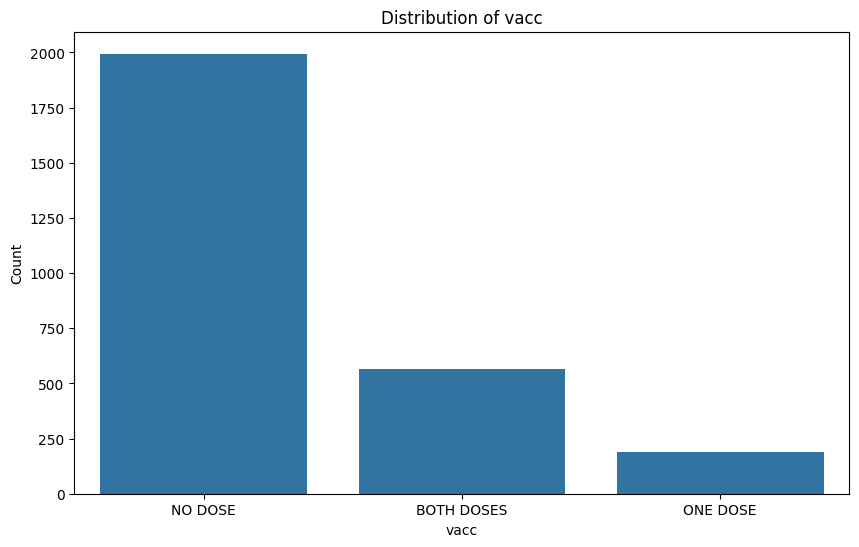

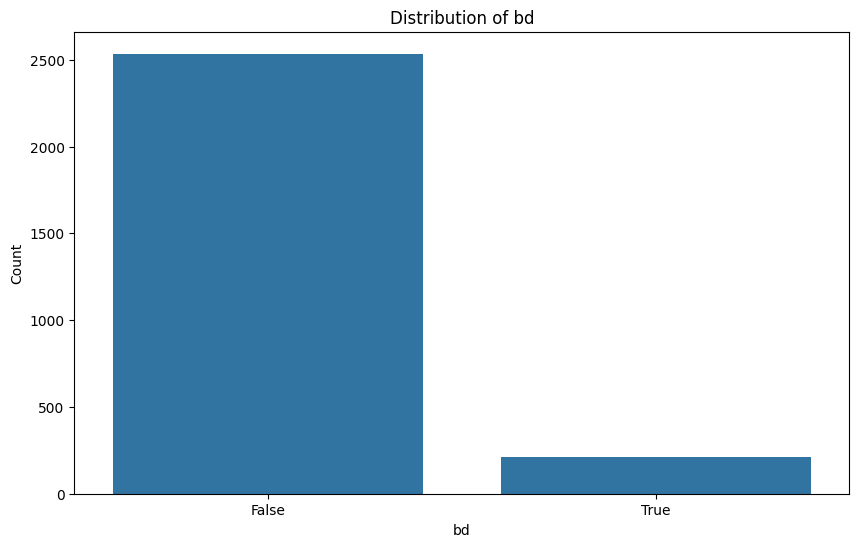

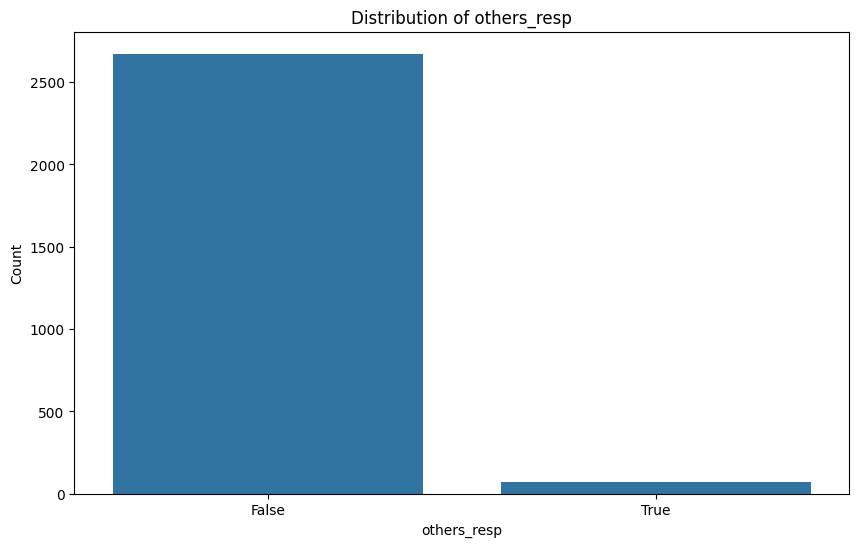

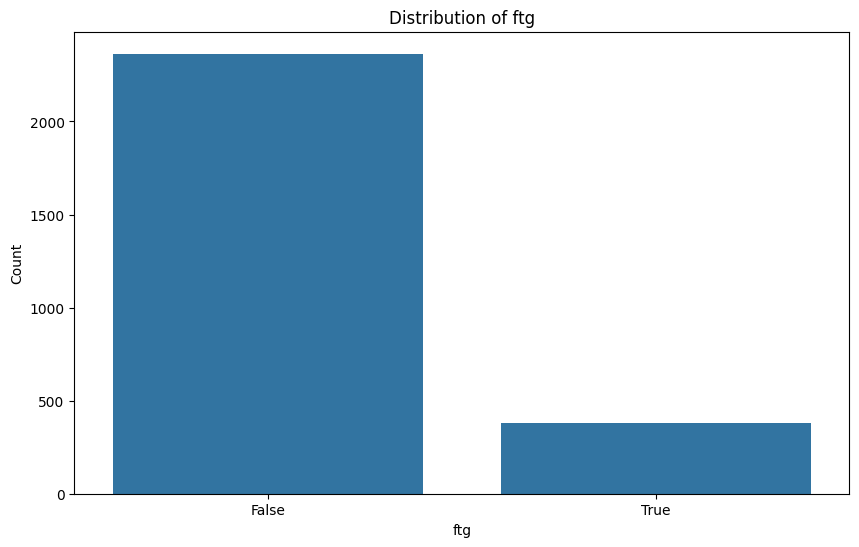

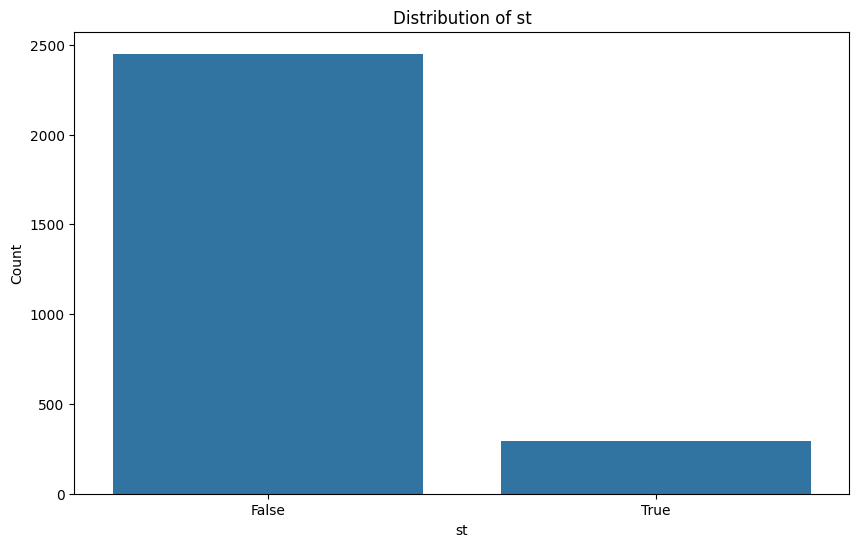

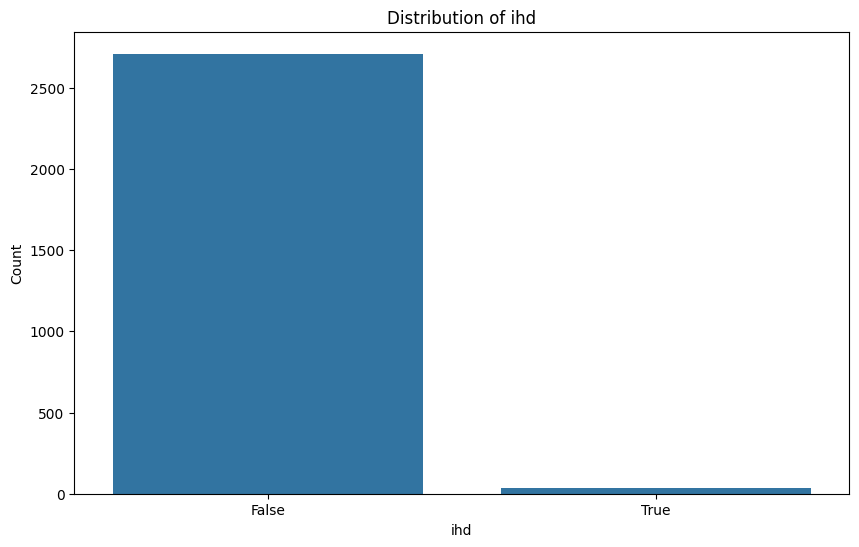

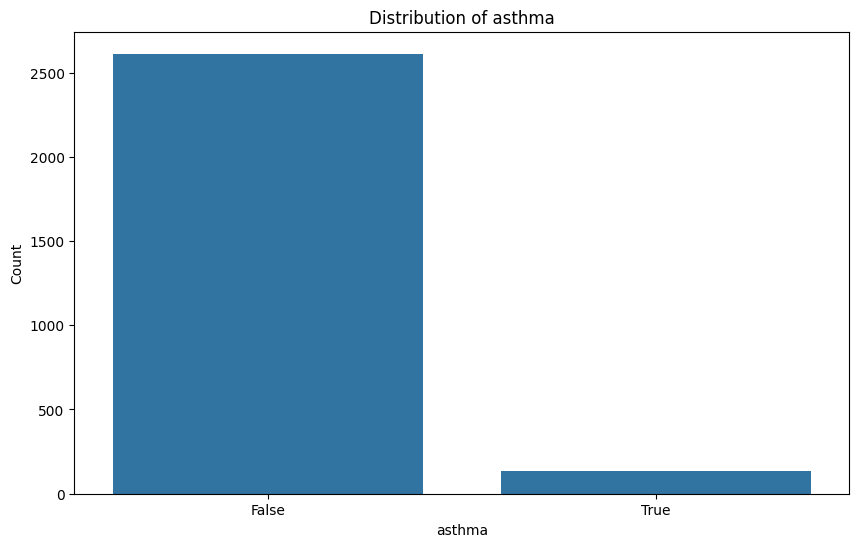

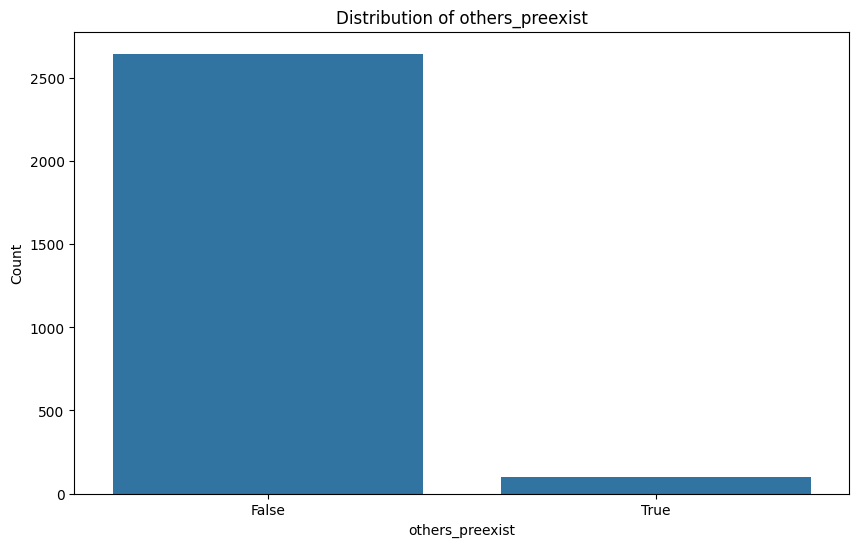

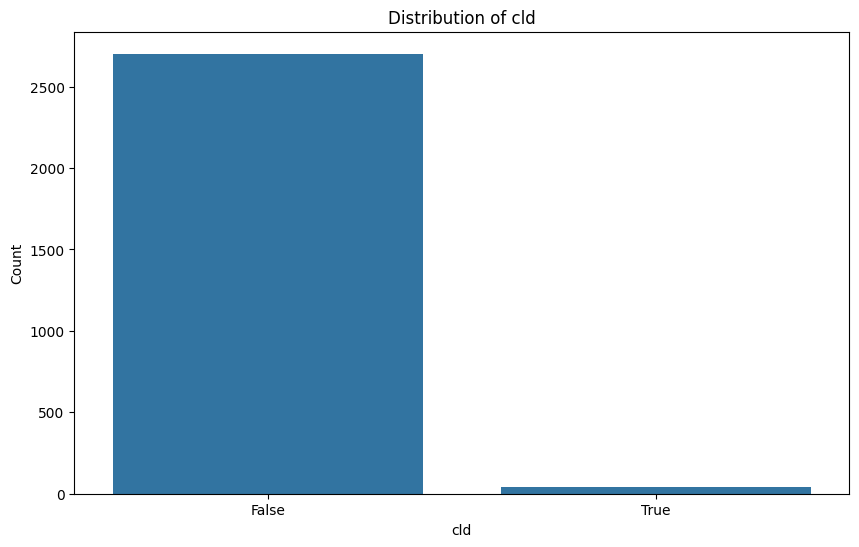

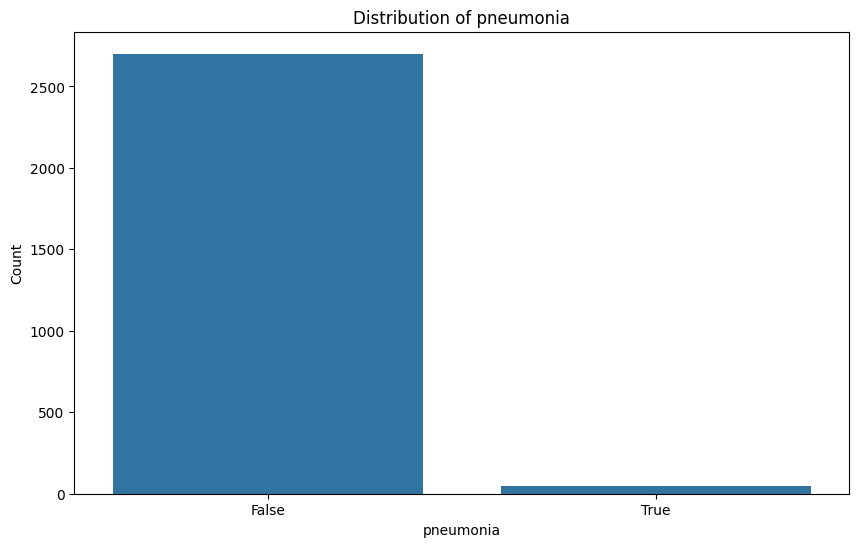

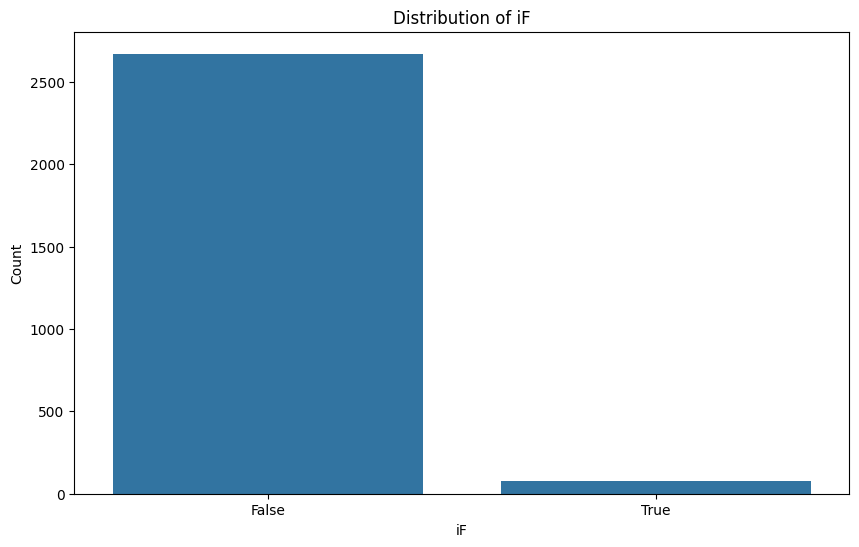

In [18]:
plot_categorical_distribution(dataset, categorical_cols)

This gives us a broder view of the data and its distibution

## Further analysis

I am currenty developing a code (`librosa_python.py`) which extracts the mfcc, waveforms, spectogram and mel spectogram plots.

These plots will be set to each of its respective id folders.

So when we do a deep learning models we will be able to filter out the id based on the csv file. Which in turn would help us retrive the plots for each of them.